# data overview 
run again? but 
- without the, photo's by China
- making sure spacing is fixed!!!!


In [249]:
# read this into df /Users/jasperhewitt/Desktop/peoples_daily.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/jasperhewitt/Desktop/text mining/homework /module 2/team_project/peoples_daily.csv')
print(len(df))
df.columns

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_68233/3534879354.py:5: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jasperhewitt/Desktop/text mining/homework /module 2/team_project/peoples_daily.csv')


91954


Index(['id', 'Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )'],
      dtype='object')

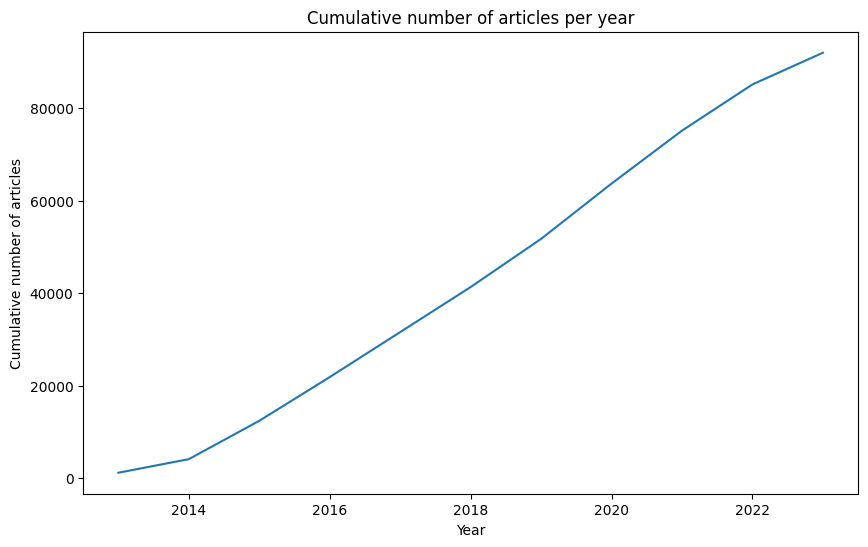

In [250]:
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])
df_yearly = df.groupby(df['Post Created Date'].dt.year).size()
df_cumulative = df_yearly.cumsum()

# Plot
plt.figure(figsize=(10,6))
df_cumulative.plot(kind='line')
plt.title('Cumulative number of articles per year')
plt.xlabel('Year')
plt.ylabel('Cumulative number of articles')
plt.show()

# preprocessing 

In [251]:
import string
#create combined_text column
df['combined_text'] = df['Message'].astype(str) + ' ' + df['Link Text'].astype(str) + ' ' + df['Image Text'].astype(str) + ' ' + df['Description'].astype(str)

#most important symbols that should be deleted '#', '@', '-'
# Get all ASCII special symbols
symbols = string.punctuation

for symbol in symbols:
    print('Symbol ' + symbol + ': ' + str(df['combined_text'].str.count('\\' + symbol).sum()))
link_pattern = r'https?://[^\s]+'
print("link: " + str(df['combined_text'].str.contains(link_pattern).sum()))
print("nan: " + str(df['combined_text'].str.count('nan').sum()))

Symbol !: 18934
Symbol ": 42811
Symbol #: 73516
Symbol $: 3126
Symbol %: 2606
Symbol &: 2214
Symbol ': 203438
Symbol (: 35747
Symbol ): 35763
Symbol *: 59
Symbol +: 333
Symbol ,: 484651
Symbol -: 126560
Symbol .: 380468
Symbol /: 64527
Symbol :: 34858
Symbol ;: 2080
Symbol <: 11
Symbol =: 3816
Symbol >: 13
Symbol ?: 7793
Symbol @: 371
Symbol [: 359
Symbol \: 9
Symbol ]: 359
Symbol ^: 5
Symbol _: 877
Symbol `: 5
Symbol {: 0
Symbol |: 30
Symbol }: 0
Symbol ~: 113
link: 10064
nan: 211243


In [ ]:
#delete special symbols and link pattern
df['combined_text'] = df['combined_text'].str.replace(link_pattern, '', regex=True)
df['combined_text'] = df['combined_text'].str.replace('#', '')
df['combined_text'] = df['combined_text'].str.replace('@', '')
df['combined_text'] = df['combined_text'].str.replace('-', '')
#since nan is a string, we can just replace it
df['combined_text'] = df['combined_text'].str.replace("nan", '')

#output results
symbols = ['#', '@', '-', 'nan']

for symbol in symbols:
    print('Symbol ' + symbol + ': ' + str(df['combined_text'].str.count(symbol).sum()))
print("link: " + str(df['combined_text'].str.contains(link_pattern).sum()))

Symbol #: 0
Symbol @: 0
Symbol -: 0
Symbol nan: 0
link: 0


In [ ]:
#print combined_text at loc 1
print(df['combined_text'].loc[1])

At least 25 people have been killed since typhoon Usagi made landfall in south China's Guangdong Province on Sunday evening. Around 5.5 million people have been affected and 310,000 displaced by the storm. Some 8,490 houses have been destroyed and 50,800 hectares of cropland damaged. The typhoon has incurred direct economic losses of 7.1 billion yuan (1.16 billion U.S. dollars) in the province.   


# NER and save results

In [ ]:
#ITS ALREADY SAVED IN THE FOLDER!!!!!!!!
import pandas as pd
import spacy
from tqdm.auto import tqdm  # Import tqdm for the progress bar functionality

# Assuming 'df' is your DataFrame and it already exists

# Load spaCy's NER model
nlp = spacy.load("en_core_web_sm")  

# Define a function to apply NER on a piece of text
def apply_ner_spacy(text):
    doc = nlp(text)
    ner_results = [(ent.text, ent.label_) for ent in doc.ents]
    return ner_results

# Make sure you've called this before using progress_apply
tqdm.pandas(desc="Processing posts")

# Apply the NER function to the 'combined_text' column with a progress bar
df['NER_output_spacy'] = df['combined_text'].progress_apply(apply_ner_spacy)

In [ ]:
# Function to filter for GPE and LOC entities from the list of entities in each row
def filter_gpe_loc(entities):
    return [text for text, label in entities if label in ['GPE', 'LOC']]

# Apply the filter function to the 'NER_output_spacy' column to create a new 'GPE_LOC_only' column
df['GPE_LOC_only'] = df['NER_output_spacy'].apply(filter_gpe_loc)

#save to a csv file called spacy_full_output.csv
#df.to_csv('spacy_full_output.csv', index=False)

In [ ]:
# #create eval dataset 
# df_eval = df[['id', 'combined_text', 'GPE_LOC_only']]

# # # give 20 random rows that contain Xinjiang
# df_xinjiang = df_eval[df_eval['combined_text'].str.contains('Xinjiang')].sample(n=20)

# #give 50 random rows in general
# df_eval= df_eval.sample(n=50) 

# #combine the two together
# df_eval_com = pd.concat([df_eval, df_xinjiang])

# #_________
# df_eval_com 
# #save to an excel file called Spacy_eval.xlsx
# #df_eval_com.to_excel('Spacy_eval_complete.xlsx', index=False)


# Analysis


In [253]:
# read this csv file to df_ner_full /Users/jasperhewitt/Desktop/text mining/homework /module 2/team_project/peoples_daily_ner_spacy_full.csv
df_ner_full = pd.read_csv('/Users/jasperhewitt/Desktop/text mining/homework /module 2/team_project/spacy_full_output.csv')
len(df_ner_full)

#only keep the columns 'serial_number' 'combined_text', 'NER_output_spacy' and 'GPE_only'
df_ner_full = df_ner_full[['id', 'Post Created Date', 'combined_text', 'NER_output_spacy', 'GPE_LOC_only']]
len(df_ner_full)

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_68233/2183636168.py:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ner_full = pd.read_csv('/Users/jasperhewitt/Desktop/text mining/homework /module 2/team_project/spacy_full_output.csv')


91954

In [254]:
import ast

def get_unique_values(text):
    # Convert string representation of list to actual list
    list_values = ast.literal_eval(text)
    # Get unique values
    unique_values = list(set(list_values))
    return unique_values

df_ner_full['GPE_LOC_unique'] = df_ner_full['GPE_LOC_only'].apply(get_unique_values)
#convert back to string
type(df_ner_full['GPE_LOC_unique'][0])
#df_ner_full['GPE_only_unique'] = df_ner_full['GPE_only_unique'].apply(lambda x: ' '.join(x))

list

In [255]:
#create new column 'GPE_LOC_unique_count' that counts the number of values in 'GPE_LOC_unique'(it is a list)
df_ner_full['GPE_LOC_unique_count'] = df_ner_full['GPE_LOC_unique'].apply(lambda x: len(x))
#convert to string
df_ner_full['GPE_LOC_unique_count'] = df_ner_full['GPE_LOC_unique_count'].astype(str)


#run Keyword Search for Xinjiang, Urumqi, Qiemo, Taklamakan, Tianshan Mountains, Ili Kazak, Kizilsu Kirgiz, Kashgar, Hotan, Aksu, Turpan, Karamay, Tacheng, Tarbagatay, Altay, Korla, Yining
#create a new column called Xinjiang_related_hits that counts the number of times these keywords appear in the GPE_LOC_unique column per row
keywords = ['Xinjiang', 'Urumqi', 'Qiemo', 'Taklamakan', 'Tianshan Mountains', 'Ili Kazak', 'Kizilsu Kirgiz', 'Kashgar', 'Hotan', 'Aksu', 'Turpan', 'Karamay', 'Tacheng', 'Tarbagatay', 'Altay', 'Korla', 'Yining', 'Kizilsu Kyrgyz', 'Dushanzi', 'Moyu', 'Tashkurgan', 'Shufu']

def keyword_search(text):
    hits = 0
    for keyword in keywords:
        if keyword in text:
            hits += 1
    return hits

df_ner_full['Xinjiang_related_hits'] = df_ner_full['GPE_LOC_unique'].apply(keyword_search)


In [256]:
#overview of the rows with most Xinjiang_related_hits
#sort by Xinjiang_related_hits
df_ner_full['GPE_LOC_unique_count'] = df_ner_full['GPE_LOC_unique_count'].astype(int)
sort_by_xinjiang = df_ner_full.sort_values(by='Xinjiang_related_hits', ascending=False)
#print top 20 rows
sort_by_xinjiang.head(10)
#convert GPE_LOC_unique to int


,id,Post Created Date,combined_text,NER_output_spacy,GPE_LOC_only,GPE_LOC_unique,GPE_LOC_unique_count,Xinjiang_related_hits
38798,PD_38799,2018-09-25,Road trips reveal Xinjiang splendor The divers...,"[('Xinjiang', 'GPE'), ('Xinjiang Uygur', 'GPE'...","['Xinjiang', 'Xinjiang Uygur', 'China', 'Xinji...","[Xinjiang, Kazak, China, Aksu, Urumqi, the Tak...",16,6
61336,PD_61337,2020-10-21,"No 'forced labor' in Xinjiang, report finds Pe...","[('Xinjiang', 'GPE'), ('Xinjiang Uygur', 'GPE'...","['Xinjiang', 'Xinjiang Uygur', 'Xinjiang', 'Xi...","[Xinjiang, Kizilsu Kirgiz, West, Hotan, Beijin...",11,5
45752,PD_45753,2019-06-26,Diplomats and representatives based in Geneva ...,"[('Geneva', 'GPE'), ('14', 'CARDINAL'), ('Xinj...","['Geneva', 'Xinjiang Uygur Autonomous Region',...","[Hotan Prefecture, Nigeria, Kashgar, Congo, La...",19,4
66597,PD_66598,2021-04-04,"Witnessing the real Xinjiang, foreign diplomat...","[('Xinjiang', 'GPE'), ('the International Gran...","['Xinjiang', 'Urumqi', 'China', 'Xinjiang Uygu...","[Xinjiang Uygur Autonomous Region, Xinjiang, A...",9,4
65808,PD_65809,2021-03-10,"Departed hero deputy missed at NPC session, bu...","[('NPC', 'ORG'), ('Proposals', 'GPE'), ('Laqin...","['Proposals', 'Beijing', 'Xinjiang', 'Xinjiang...","[the Pamir Plateau, Xinjiang, Shufu, Beijing, ...",8,4
47632,PD_47633,2019-08-24,Diplomats from 7 countries visit Xinjiang Amba...,"[('7', 'CARDINAL'), ('Xinjiang Ambassadors', '...","['Xinjiang Uyghur Autonomous Region', 'Laos', ...","[Xinjiang, Philippines, Turpan, Cambodia, Sri ...",13,3
33782,PD_33783,2018-03-26,Xinjiang police deal with heavy workload prote...,"[('Xinjiang', 'GPE'), ('Deep', 'GPE'), ('the n...","['Xinjiang', 'Deep', 'Liudaowan', 'Urumqi', 'X...","[Xinjiang, China, Urumqi, Xinjiang Uyghur Auto...",7,3
64793,PD_64794,2021-02-05,Xinjiang officials and residents use personal ...,"[('Xinjiang', 'GPE'), ('China', 'GPE'), ('Xinj...","['Xinjiang', 'China', 'Xinjiang Uygur', 'Xinji...","[Xinjiang, Beijing, Hotan, China, Kuqa, Aksu, ...",10,3
2192,PD_2193,2014-03-19,A Uyghur man stabbed a police officer to death...,"[('Uyghur', 'ORG'), ('Urumqi', 'GPE'), ('Xinji...","['Urumqi', 'Xinjiang', 'Xinjiang', 'Aksu']","[Urumqi, Xinjiang, Aksu]",3,3
44677,PD_44678,2019-05-16,"Dailyrunning 10,000tonne freight trains spur e...","[('10,000tonne', 'CARDINAL'), ('China', 'GPE')...","['China', 'Xinjiang', 'China', 'Xinjiang Uygur...","[Xinjiang Uygur Autonomous Region, Xinjiang, K...",6,3


In [257]:
#sum of Xinjiang_related_hits, and sum of GPE_LOC_unique_count
#sum df_ner_full['Xinjiang_related_hits']
print(df_ner_full['Xinjiang_related_hits'].sum())
#sum df_ner_full['GPE_LOC_unique_count']
print(df_ner_full['GPE_LOC_unique_count'].sum())


1473
252810


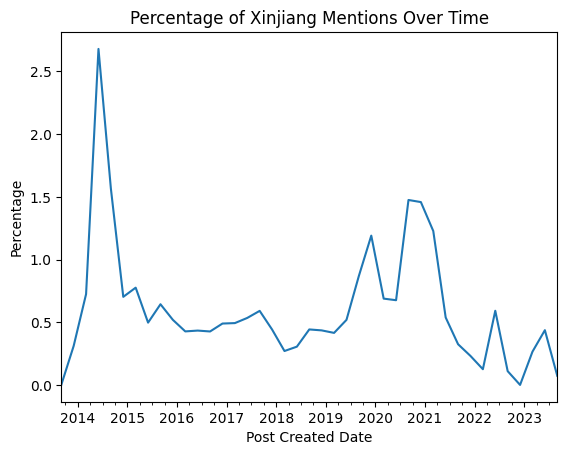

In [258]:
# #rough code 

# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert 'Post_created_date' to datetime and set it as the index
# df_ner_full['Post Created Date'] = pd.to_datetime(df_ner_full['Post Created Date'])
# df_ner_full.set_index('Post Created Date', inplace=True)

# # Resample the DataFrame to semi-annual frequency
# df_resampled = df_ner_full.resample('6M')




# # Calculate the percentage of 'Xinjiang' mentions
# percentage_xinjiang = (Xinjiang_related_hits / GPE_LOC_unique_count) * 100

# # Plot the percentages over time
# percentage_xinjiang.plot()
# plt.title('Percentage of Xinjiang Mentions Over Time')
# plt.ylabel('Percentage')
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Post Created Date' to datetime and set it as the index
df_ner_full['Post Created Date'] = pd.to_datetime(df_ner_full['Post Created Date'])
df_ner_full.set_index('Post Created Date', inplace=True)

# Resample the DataFrame to quarterly frequency
df_resampled = df_ner_full.resample('3M')

# Calculate the sum of 'Xinjiang_related_hits' and 'GPE_LOC_unique_count' for each period
xinjiang_hits_resampled = df_resampled['Xinjiang_related_hits'].sum()
gpe_loc_count_resampled = df_resampled['GPE_LOC_unique_count'].sum()

# Calculate the percentage of 'Xinjiang' mentions for each period
percentage_xinjiang = (xinjiang_hits_resampled / gpe_loc_count_resampled) * 100

# Plot the percentages over time
percentage_xinjiang.plot()
plt.title('Percentage of Xinjiang Mentions Over Time')
plt.ylabel('Percentage')
plt.show()

In [259]:
#sum of Xinjiang_related_hits, and sum of GPE_LOC_unique_count
#sum df_ner_full['Xinjiang_related_hits']
print(df_ner_full['Xinjiang_related_hits'].sum())
#sum df_ner_full['GPE_LOC_unique_count']
print(df_ner_full['GPE_LOC_unique_count'].sum())


1473
252810


In [260]:
#print min and max date of df_ner_full. the date is on index
print(df_ner_full.index.min())
print(df_ner_full.index.max())

2013-09-24 00:00:00
2023-09-22 00:00:00


# T-test

In [261]:
#prepare a new dataframe from df_ner_full that contains only the rows from 2016-01-01 until 2018-06-01 
df_ner_full_2016_2018 = df_ner_full.loc['2016-01-01':'2018-06-30']
print(len(df_ner_full_2016_2018))
#now for 2018-06-01 until 2021-01-01
df_ner_full_2018_2021 = df_ner_full.loc['2018-06-30':'2021-01-01']
print(len(df_ner_full_2018_2021))

23979
27348


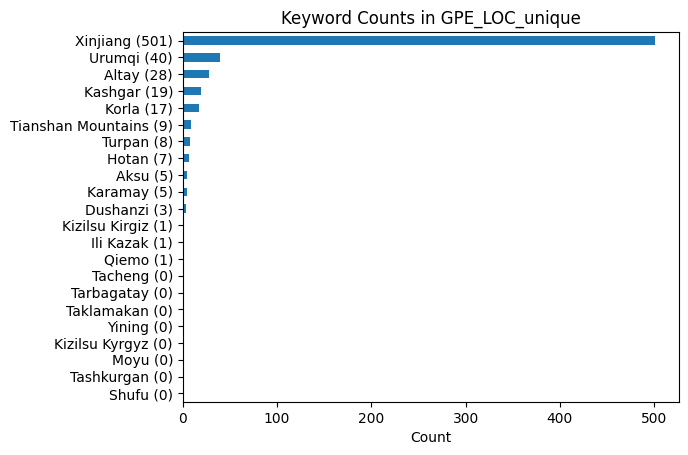

In [265]:
import matplotlib.pyplot as plt

keywords = ['Xinjiang', 'Urumqi', 'Qiemo', 'Taklamakan', 'Tianshan Mountains', 'Ili Kazak', 'Kizilsu Kirgiz', 'Kashgar', 'Hotan', 'Aksu', 'Turpan', 'Karamay', 'Tacheng', 'Tarbagatay', 'Altay', 'Korla', 'Yining', 'Kizilsu Kyrgyz', 'Dushanzi', 'Moyu', 'Tashkurgan', 'Shufu']

# # Initialize a dictionary to store the counts
# counts = {}

# # Iterate over each keyword and count its occurrences
# for keyword in keywords:
#     counts[keyword] = df_ner_full_2018_2021['GPE_LOC_unique'].apply(lambda x: x.count(keyword)).sum()

# # Convert the dictionary to a pandas Series
# counts_series = pd.Series(counts)

# # Plot the Series as a bar chart
# counts_series.plot(kind='bar')
# plt.title('Keyword Counts in GPE_LOC_unique')
# plt.ylabel('Count')
# plt.show()

# Plot the Series as a horizontal bar chart
counts_series.plot(kind='barh')

# Modify the y-tick labels to include the counts
plt.yticks(range(len(counts_series)), [f'{index} ({value})' for index, value in zip(counts_series.index, counts_series.values)])

plt.title('Keyword Counts in GPE_LOC_unique')
plt.xlabel('Count')
plt.gca().invert_yaxis()  # Invert the y-axis so the keyword with the most hits is at the top
plt.show()

In [ ]:
#

In [245]:
df_ner_full_2016_2018
#add a column called xinjiang_location_share that contains the percentage of Xinjiang_related_hits compared to GPE_LOC_unique_count per row 
df_ner_full_2016_2018['xinjiang_location_share'] = (df_ner_full_2016_2018['Xinjiang_related_hits'] / df_ner_full_2016_2018['GPE_LOC_unique_count']) * 100
#delete rows where xinjiang_location_share is NaN
df_ner_full_2016_2018 = df_ner_full_2016_2018.dropna(subset=['xinjiang_location_share'])

#now do the same for df_ner_full_2018_2021
df_ner_full_2018_2021['xinjiang_location_share'] = (df_ner_full_2018_2021['Xinjiang_related_hits'] / df_ner_full_2018_2021['GPE_LOC_unique_count']) * 100
df_ner_full_2018_2021 = df_ner_full_2018_2021.dropna(subset=['xinjiang_location_share'])


/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_68233/3756678007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ner_full_2016_2018['xinjiang_location_share'] = (df_ner_full_2016_2018['Xinjiang_related_hits'] / df_ner_full_2016_2018['GPE_LOC_unique_count']) * 100
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_68233/3756678007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ner_full_2018_2021['xinjiang_location_share'] = (df_ner_full_2018_2021['Xinjiang_related_hits'] / d

In [246]:
df_ner_full_2018_2021

,id,combined_text,NER_output_spacy,GPE_LOC_only,GPE_LOC_unique,GPE_LOC_unique_count,Xinjiang_related_hits,xinjiang_location_share
Post Created Date,,,,,,,,
2018-06-30,PD_36349,Mount Agung volcano erupts in the Kubu subdist...,"[('Mount Agung', 'PERSON'), ('Kubu', 'GPE'), (...","['Kubu', 'Indonesia', 'Bali', 'China']","[Indonesia, Kubu, Bali, China]",4,0,0.0
2018-06-30,PD_36350,Jiuzhai Valley to close following landslide UN...,"[('Jiuzhai Valley', 'LOC'), ('UNESCO World Her...","['Jiuzhai Valley', 'Jiuzhai Valley', 'the Qing...","[the QinghaiTibet Plateau, Jiuzhai Valley, China]",3,0,0.0
2018-06-30,PD_36351,"An exhibition titled ""Better Life, Dream Come ...","[('Better Life, Dream Come TruePoverty Allevia...","['China', 'New York', 'China']","[New York, China]",2,0,0.0
2018-06-30,PD_36352,Nineteen top fashion design award winners from...,"[('Nineteen', 'CARDINAL'), ('China', 'GPE'), (...","['China', 'Hangzhou City', 'East China’s', 'Zh...","[East China’s, Hangzhou City, Zhejiang Provinc...",4,0,0.0
2018-06-30,PD_36353,China is looking to open its State Preeminent ...,"[('China', 'GPE'), ('State Preeminent Science ...","['China', 'South China Morning Post']","[South China Morning Post, China]",2,0,0.0
...,...,...,...,...,...,...,...,...
2021-01-01,PD_63692,Chinese mainland reports 9 new locally transmi...,"[('Chinese', 'NORP'), ('9', 'CARDINAL'), ('Chi...","['Beijing', 'China', 'Liaoning Province', 'Sha...","[Shanghai, Liaoning Province, Beijing, China, ...",7,0,0.0
2021-01-01,PD_63693,Say hi to the new year of 2021! First ray of s...,"[('the new year', 'DATE'), ('2021', 'DATE'), (...","['China', 'China']",[China],1,0,0.0
2021-01-01,PD_63694,The Forbidden City in Beijing glows with the f...,"[('The Forbidden City', 'GPE'), ('Beijing', 'G...","['The Forbidden City', 'Beijing', 'The Forbidd...","[Beijing, The Forbidden City]",2,0,0.0


In [237]:
from scipy.stats import ttest_ind

# Run a t-test to compare 'xinjiang_location_share' between the two dataframes
t_stat, p_value = ttest_ind(df_ner_full_2016_2018['xinjiang_location_share'], df_ner_full_2018_2021['xinjiang_location_share'])

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -9.05960189158543
P-value: 1.3579135512100041e-19


In [248]:
#do this for the full ner dataset 
#add a column called xinjiang_location_share that contains the percentage of Xinjiang_related_hits compared to GPE_LOC_unique_count per row 
df_ner_full['xinjiang_location_share'] = (df_ner_full['Xinjiang_related_hits'] / df_ner_full['GPE_LOC_unique_count']) * 100
#delete rows where xinjiang_location_share is NaN
#df_ner_full = df_ner_full_2016_2018.dropna(subset=['xinjiang_location_share'])
df_ner_full

#save to csv file called xinjiang_location_share_per_post.csv
#df_ner_full.to_csv('xinjiang_location_share_per_post.csv', index=False)